Zipf's law helps us analyze and observe how different tokens (words) are distributed across a sentence. In this question, we will compute the frequency of each token and rank them in their decreasing order of frequency. 

In order to proceed, we first pre-process the given corpora i.e. remove uni-code strings and split them on the basis of their whitespaces `.split()`. Next we use NLTK's `FreqDist` function to compute the frequency of each token and store the output in a `dict`. The point in storing them in a dictionary gives the advantage that its `key` are the tokens and `value` are its frequency, and thus we can look up the frequency of any given word.

Once the dictionary is ready we sort the frequency dictionary in descending order and plot the curve with linear scaling as well as log scaling.

In [3]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

# author : Sangeet Sagar
# e-mail : sasa00001@stud.uni-saarland.de
# Organization: Universität des Saarlandes

"""
Plot the frequency curves for the corpora with linear and log scaling
"""

import nltk
import operator
import matplotlib.pyplot as plt
%matplotlib inline


def frequency_curve(filename):
    """Returns two lists containing  word position and word frequency

    Args:
        filename (str): path to file

    Returns:
        list: word_pos- list containing position in the frequency list 
        list: frq_list- list containing frequency of words

    """
    file = open(filename, 'r', encoding='utf-8-sig')
    words = [x.lower() for x in file.read().split()]

    frq_dict = nltk.FreqDist(words)

    # Sorting list in descending order of frequency
    frq_dict = dict(
        sorted(frq_dict.items(), key=operator.itemgetter(1), reverse=True))

    # Separate out word frequencies and word into lists.
    frq_list = list(frq_dict.values())
    word_list = list(frq_dict.keys())
    word_pos = range(0, len(word_list))

    return (word_pos, frq_list)


def plot_style(filelist, num_frequent=None, linear=True, loglog=False):
    """Plot frequency curves for the corpora as per given scaling

    Args:
        filelist (int): list containing names of all files
        num_frequent (int): choose most frequent words
        linear (bool): type of plot- linear scaling
        loglog (bool): type of plot- log scaling

    Returns:
        None

    """
    i = -1
    fig, ax = plt.subplots()
    labs = ["The Jungle Book", "King James Bible",
            "SETIMES Turkish", "SETIMES Bulgarian"]
    for file in filelist:
        i += 1
        word_pos, frq_list = frequency_curve(file)
        if num_frequent is not None:
            if num_frequent < len(word_pos):
                word_pos = range(1, num_frequent+1)
                frq_list = frq_list[0:len(word_pos)]
        if loglog:
            ax.loglog(word_pos, frq_list, label=str(labs[i]))
        else:
            ax.plot(word_pos, frq_list, label=str(labs[i]))

    ax.legend()
    ax.set_xlabel("token= word")
    if loglog:
        ax.set_ylabel("log(Frequency)")
        ax.set_title("Frequency Curve with log scaling")

    else:
        ax.set_title("Frequency Curve with linear scaling")
        ax.set_ylabel("Frequency")
        if num_frequent is not None:
            ax.set_title(
                "Frequency Curve with linear scaling- only top 100 words")

    ax.grid()
    plt.show()


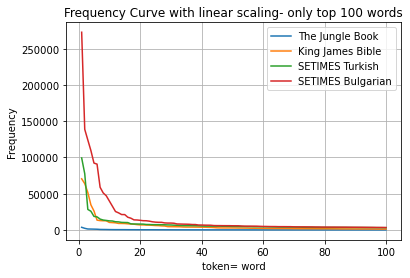

In [5]:
filelist = [str("data/" + x) for x in ["junglebook.txt",
                                       "kingjamesbible_tokenized.txt", "SETIMES.bg-tr.tr", "SETIMES.bg-tr.bg"]]
plot_style(filelist, num_frequent=100)

In the graph above it can be seen that frequency decreases very rapidly with the word position. It can be interpreted that some words in the corpora score very high (the left tail in the plots) and a huge number of elements score very low (to the extreme right side)

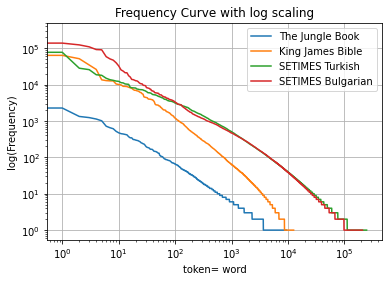

In [6]:
plot_style(filelist, num_frequent=None, loglog=True)

A loglog plot show better detail in the extremities